In [4]:
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Вывод информации о наборе данных
print("Размер набора данных:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

# Проверка на пропущенные значения
print("\nКоличество пропущенных значений:")
display(df.isnull().sum())

Размер набора данных: (1599, 12)

Первые 5 строк:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Количество пропущенных значений:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Статистическое описание числовых переменных:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


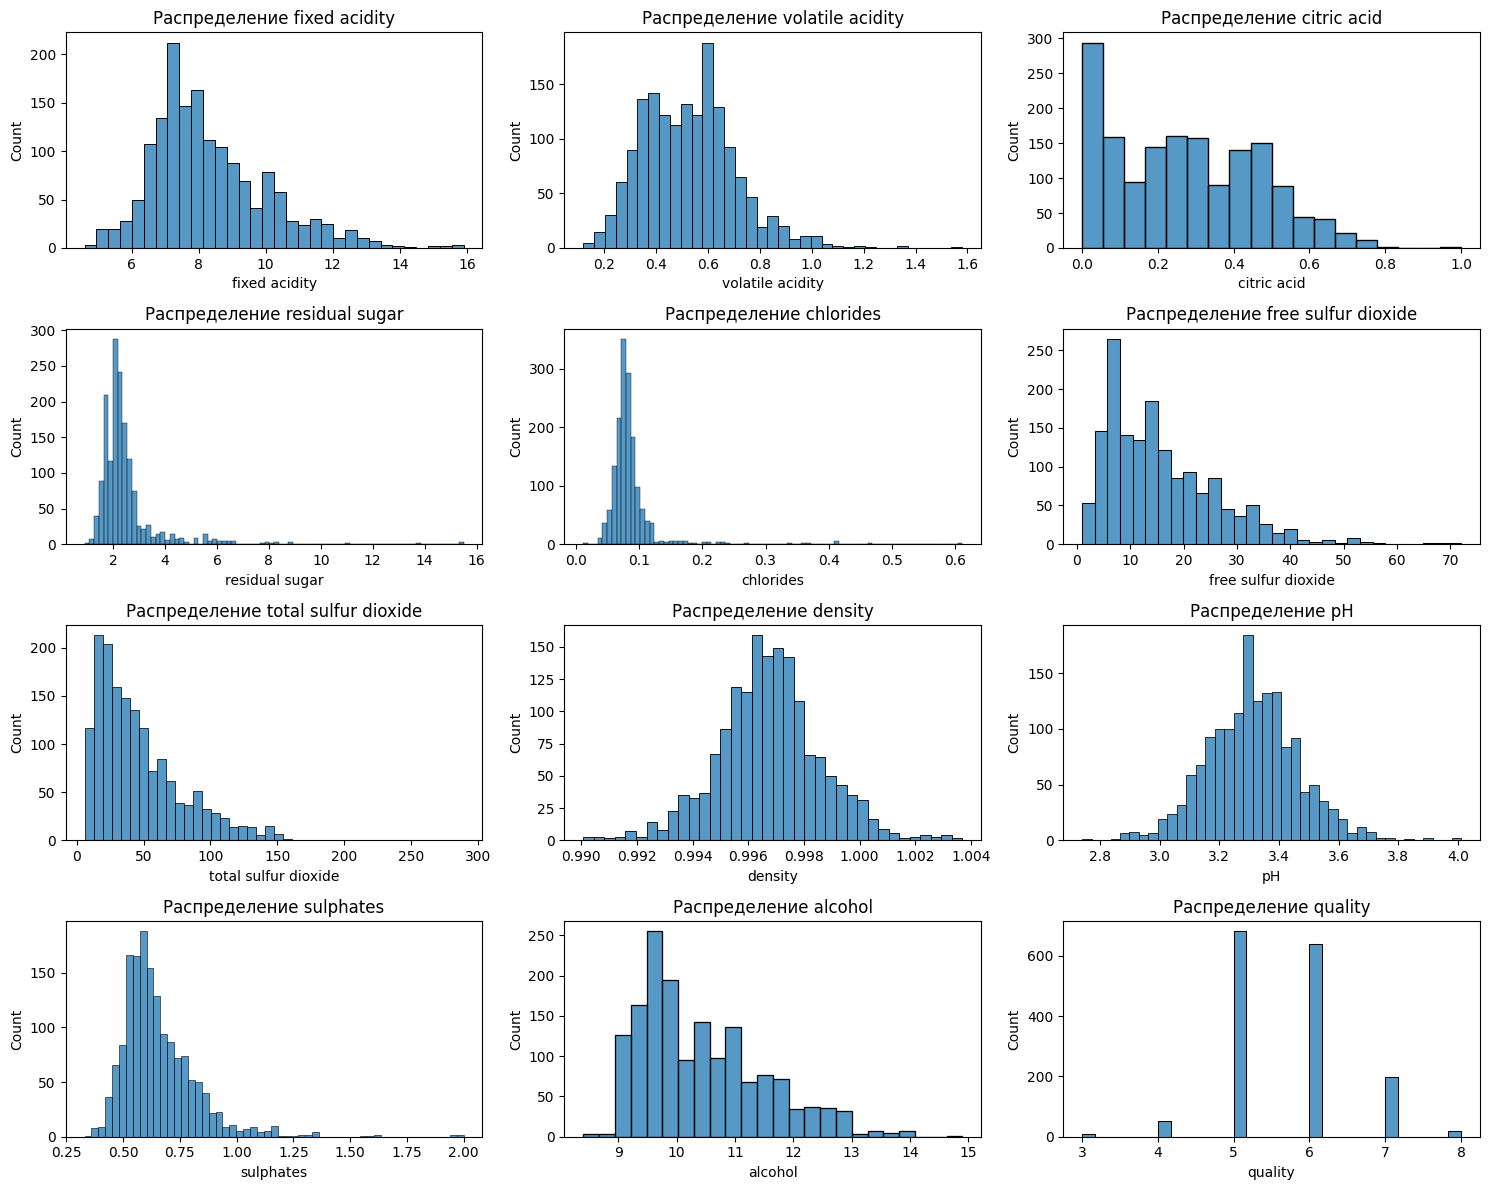

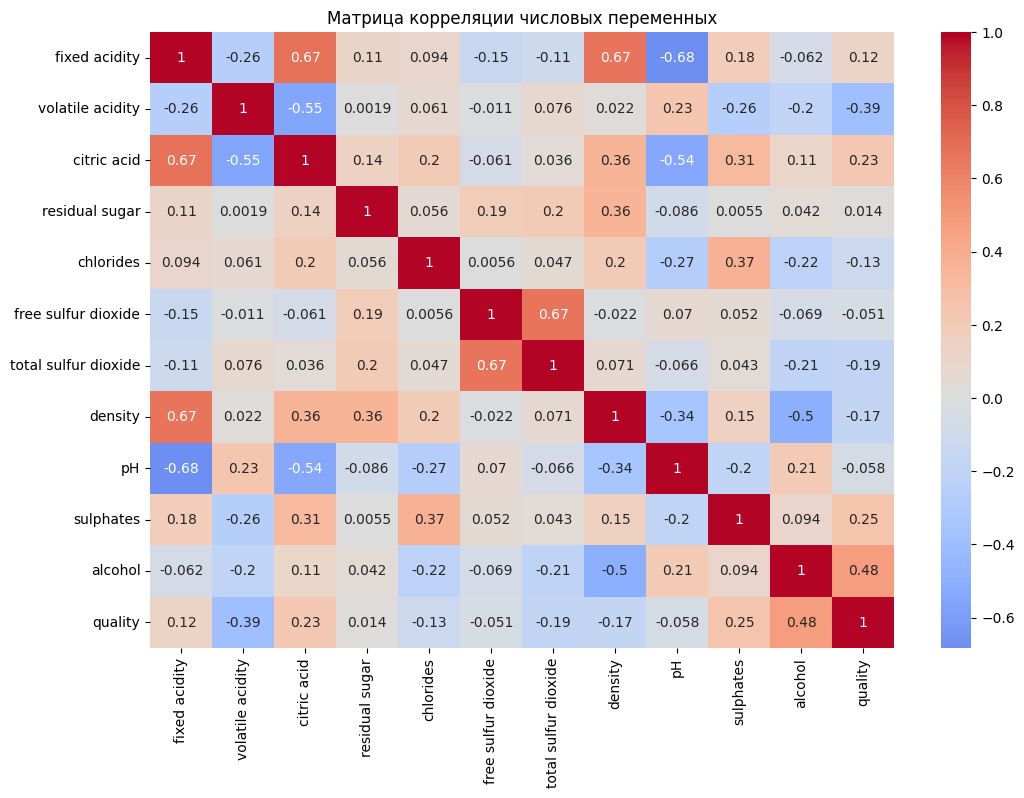

In [5]:
# Статистическое описание числовых переменных
print("Статистическое описание числовых переменных:")
display(df.describe())

# Построение гистограмм для числовых переменных
numeric_columns = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Распределение {col}')

plt.tight_layout()
plt.show()

# Построение матрицы корреляции
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции числовых переменных')
plt.show()

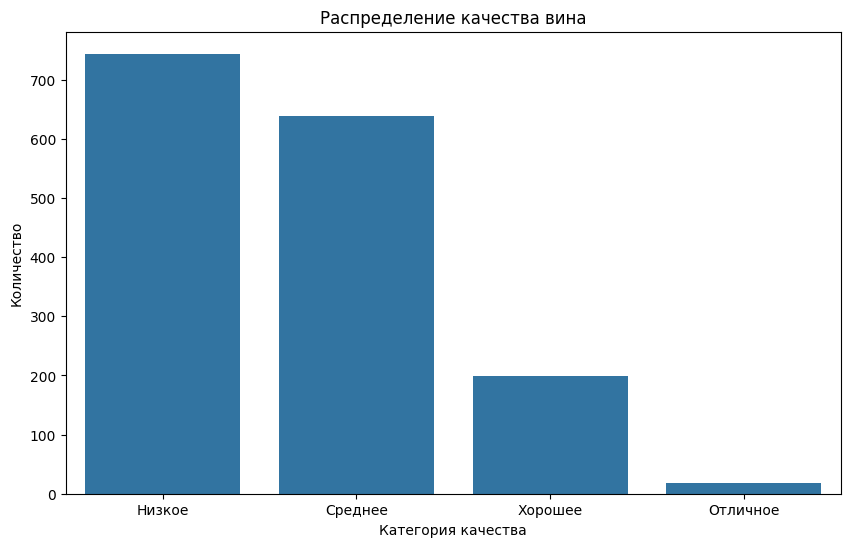

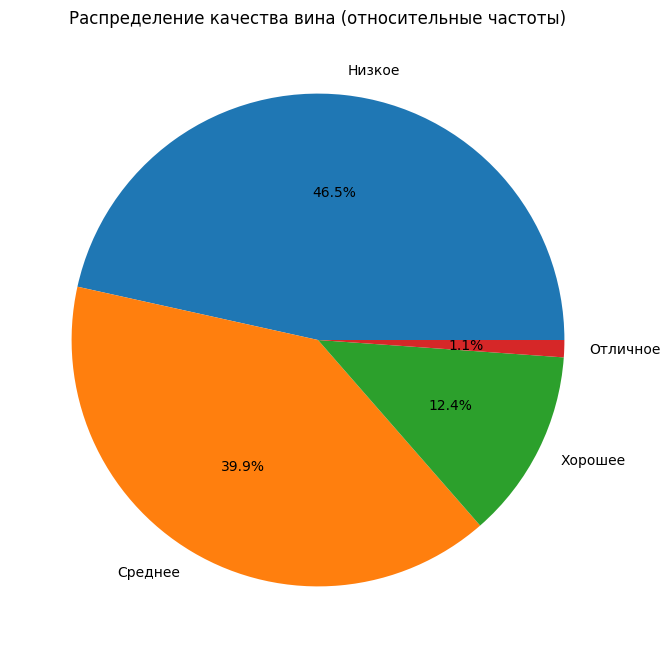

In [6]:
# Преобразование качества вина в категориальную переменную
df['quality_category'] = pd.cut(df['quality'], 
                               bins=[0, 5, 6, 7, 10], 
                               labels=['Низкое', 'Среднее', 'Хорошее', 'Отличное'])

# Столбчатая диаграмма для категориальной переменной
plt.figure(figsize=(10, 6))
quality_counts = df['quality_category'].value_counts()
sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.title('Распределение качества вина')
plt.xlabel('Категория качества')
plt.ylabel('Количество')
plt.show()

# Круговая диаграмма
plt.figure(figsize=(10, 8))
plt.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%')
plt.title('Распределение качества вина (относительные частоты)')
plt.show()

C:\Users\carev\AppData\Local\Temp\ipykernel_6704\3083688442.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['quality_category', 'acidity_level']).size().unstack()


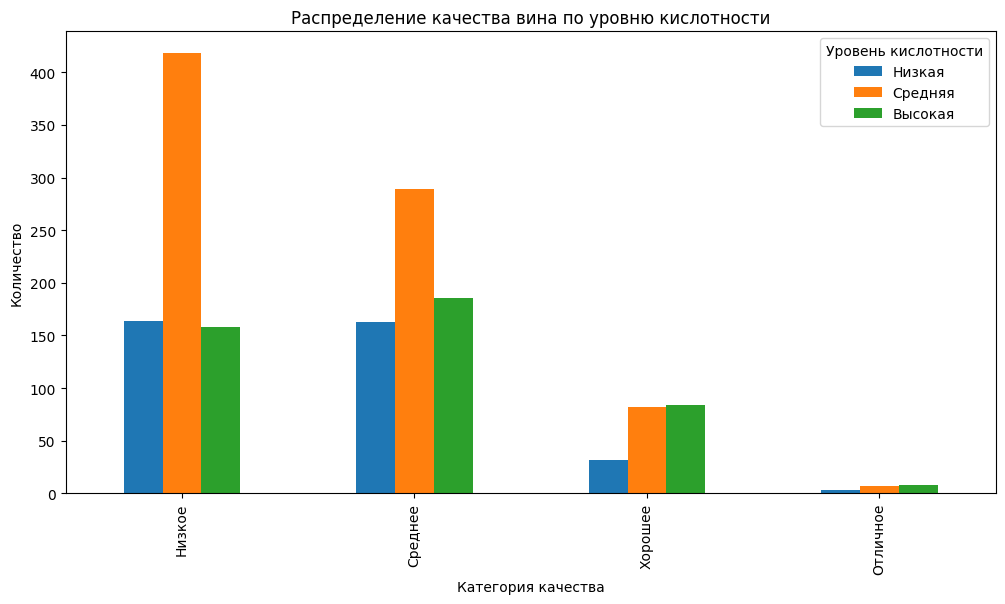

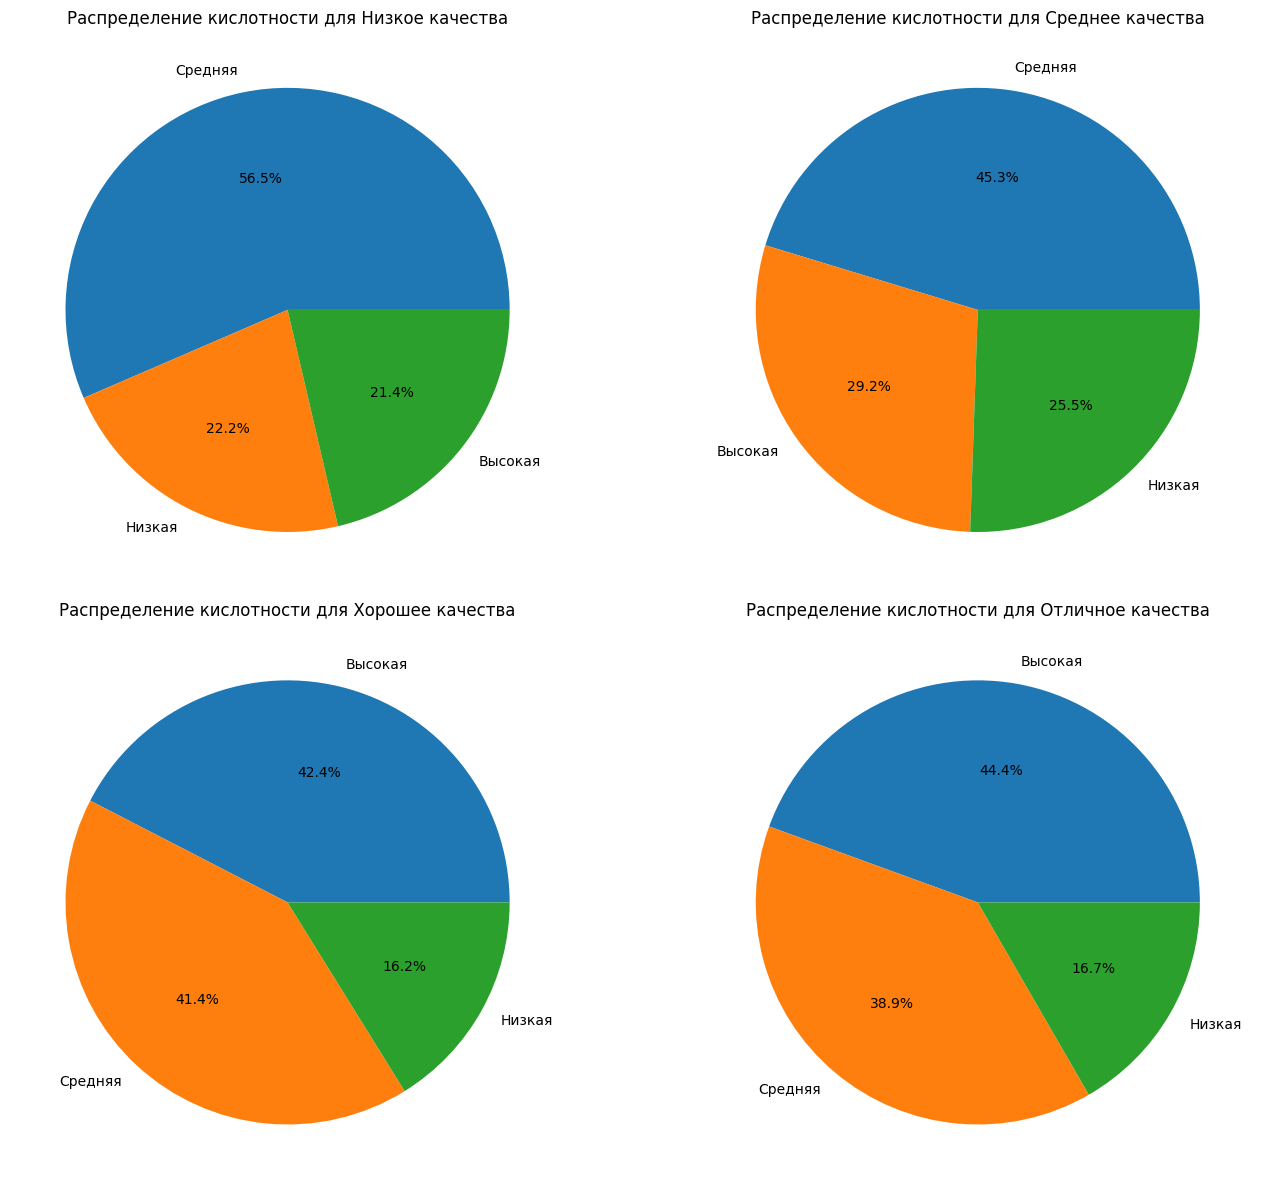

In [7]:
# Создание дополнительной категориальной переменной на основе кислотности
df['acidity_level'] = pd.cut(df['fixed acidity'], 
                            bins=[0, 7, 9, 15], 
                            labels=['Низкая', 'Средняя', 'Высокая'])

# Групповой анализ
grouped_data = df.groupby(['quality_category', 'acidity_level']).size().unstack()

# Столбчатая диаграмма группового анализа
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Распределение качества вина по уровню кислотности')
plt.xlabel('Категория качества')
plt.ylabel('Количество')
plt.legend(title='Уровень кислотности')
plt.show()

# Круговая диаграмма для каждой категории качества
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, quality in enumerate(['Низкое', 'Среднее', 'Хорошее', 'Отличное']):
    data = df[df['quality_category'] == quality]['acidity_level'].value_counts()
    axes[idx].pie(data.values, labels=data.index, autopct='%1.1f%%')
    axes[idx].set_title(f'Распределение кислотности для {quality} качества')

plt.tight_layout()
plt.show()